## **PROJET DE RECONNAISSANCE D'IMAGE** ## 



*   Test avec **Knn** (algorithme des plus proches voisins)
*   Test avec les **RNN** (Réseaux de neurones classiques)
*   Test avec **CNN** (Réseaux de neurones à convolution) 





*   **Dans un premier temps, nous chargeons nos données et vérifions que c'est bien ce que nous souhaitons.**




170500096/170498071 [==============================] - 12s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(5000, 32, 32, 3), y=(5000, 1)
Val: X=(5000, 32, 32, 3), y=(5000, 1)


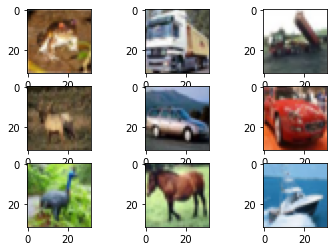

In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print('Val: X=%s, y=%s' % (X_val.shape, y_val.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

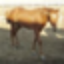

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = X_train[2000]

image_resize = cv2.resize(image, (64, 64)) ## redimensionner une image en 32x32

cv2_imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)) ## voir une image

image_flatten = image.flatten() ##Transformer l'image (hauteur, largeur, canaux) en un tableau unidimensionnel.

X_train_flatten = X_train.reshape(X_train.shape[0], -1)## Transformer le train set (nombre_images, hauteur, largeur, canaux) en un tableau unidimensionnel (nombre_images, hauteur*largeur*canaux).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   **Il est important de normaliser les données afin que l'apprentissage ne soit pas touchée par des différences de représentation ou des valeurs trop extrêmes.**



In [4]:
# normalize to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0



### **1.   Apprentissage avec KNN** ###

*   **Je commence tout d'abord par KNN, je commence mon apprentissage avec les bases d'apprentisages X_train et Y_train.
Cependant, après un premier lancement, je me retrouve confronté à un problème de temps.
De plus les performances ne sont pas terrible pour un temps de calcul si long (en ce qui concerne le test).
C'est pourquoi je choisi de découper mes données afin d'avoir moins de temps de traitement**



In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)[:500] ## Prendre les premiers 500 images pour les knn cela ira plus vite
X_val_flatten = X_val.reshape(X_val.shape[0], -1)[:500]

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)[:500] ## Prendre les premiers 500 classes
y_val = y_val.reshape(-1)[:500]

print(X_train_flatten.shape, y_train.shape)
print(X_test_flatten.shape, y_test.shape)
print(X_val_flatten.shape, y_val.shape)

(50000, 3072) (50000,)
(500, 3072) (500,)
(500, 3072) (500,)


*   **Je choisi tout d'abord 3 "plus proche voisins", afin d'observer si l'apprentissage est performant avec un petit n. Je pourrais ensuite tester pour plusieurs nombres de voisins différents afin d'observer les performances de ceux-ci.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flatten, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test_flatten, y_test)

0.328

*   **On constate que le test est plus rapide avec ce découpage, cependant on obtient une précision de 0.334. Ce n'est pas tellement concluant. Il nous faut maintenant tester pour plusieur valeurs différentes de nombre de voisins.**


In [ ]:
import matplotlib.pyplot as plt
def check_results_different_k(from_k, to_k, X_train, X_test):
  scores = []
  k_values = []
  for k in range(from_k, to_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    k_values.append(k)
  plt.plot(k_values, scores)
  plt.show()

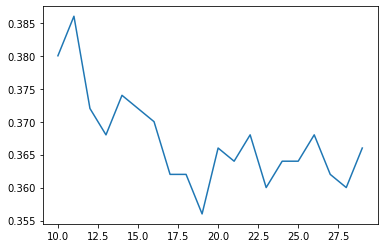

In [ ]:
check_results_different_k(10, 30, X_train_flatten, X_test_flatten)

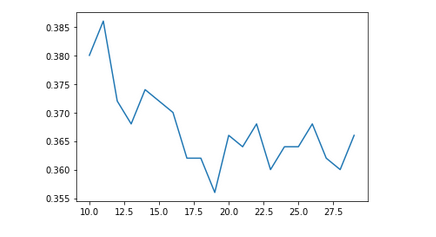

*   **Après avoir testé avec ma fonction des valeurs de 1 à 10 puis de 10 à 30 voisins, il est évident que le maximum de précision est atteind pour 11 voisins environs. Après quoi, elle ne fait que décroitre. Cette précision a une valeur de 0.39 environ, ce qui n'est pas très performant.**


### **2.   Apprentissage avec RNN** ###



*   **Ici, je modifie les labels afin de les encoder pour qu'ils soient plus lisible pour mon réseau de neurones**



In [ ]:
import keras
nb_classes = 10 #Nous avons 10 classes (de 0 à 9)
y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10) 
y_val_cat = keras.utils.to_categorical(y_val, 10)


print("Original class:", y_test[0], ", Class in one-hot encoding:", y_test_cat[0]) #Vérifions quelques valeurs pour les données déstinées au CNN
print("Original class:", y_test[1], ", Class in one-hot encoding:", y_test_cat[1])
print("Original class:", y_test[2], ", Class in one-hot encoding:", y_test_cat[2])
print("Original class:", y_test[3], ", Class in one-hot encoding:", y_test_cat[3])



Original class: 8 , Class in one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Original class: 6 , Class in one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Original class: 7 , Class in one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Original class: 8 , Class in one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


*   **Nos résultats sont bons, nous avons effectivement l'encodage de réussi. Par exemple, l'élément 0 de y_test est de la classe 5 et donc de classe [0,0,0,0,0,1,0,0,0,0] en one-hot encoding, car les classes vont de 0 à 9 dans notre cas et donc la classe 5 est en 6ème sur l'encodage. Nous pouvons désormais commencer par créer un modèle avec une seule neurone dans la couche cachée.**

In [ ]:
input_size = X_train_flatten.shape[1] 

from keras.models import Sequential
from keras.layers import Dense, Activation 

model = Sequential() #je défini mon modèle
model.add(Dense(1, input_dim=input_size, activation='relu')) ## J'incorpore le neurone caché unique
model.add(Dense(nb_classes, activation='softmax')) ## Les prédictions

model.summary() ## On affiche les caractéristiques de notre modèle 

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3073      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 3,093
Trainable params: 3,093
Non-trainable params: 0
_________________________________________________________________


*   **Nous allons maintenant entraîner notre réseau pour plusieurs epochs.
Nous créons un réseau de neurones avec un seul neurone dans sa couche cachée.
Nous avons choisi d'utiliser des lots d'une taille de 125 échantillons et d'entraîner pour une seule époque. 
Nous avons donc divisé l'ensemble training en groupes de 125 photos. Notre ensemble d'entraînement compte 50000 photos, si nous le divisons en groupes de 125, nous aurons 400 lots de 125 photos.**

In [ ]:
print("Training....")
model.fit(X_train_flatten, y_train_cat, epochs=1, batch_size=125)

Training....
400/400 [==============================] - 1s 3ms/step - loss: 2.2860 - accuracy: 0.1183


*   **accuracy: 0.1243, nous continuons avec ces résultats peu probant mais non surprenant, en effet, il est normal qu'un modèle à un neurone ait du mal à avoir une bonne précision.**

*   **Nous pouvons imaginer que le problème est donc qu'il n'y a qu'un neurone dans la couche cachée. Or, dans le cadre de l'analyse d'image, nous pouvons imaginer qu'il faut un assez important nombre de neurones, et qu'un seul neurone ne peut représenter assez de pixels pour prédire une image.**

In [ ]:
from keras.callbacks import EarlyStopping

ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20)

model = Sequential()

model.add(Dense(1, input_dim=input_size, activation='relu')) 

model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flatten, y_train_cat, validation_data=(X_val_flatten, y_val_cat), epochs=100, batch_size=125, callbacks=[ourCallback])

Epoch 1/100
400/400 [==============================] - 1s 3ms/step - loss: 2.2563 - accuracy: 0.1508 - val_loss: 2.2288 - val_accuracy: 0.1740
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 2.2037 - accuracy: 0.1661 - val_loss: 2.1873 - val_accuracy: 0.1800
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 2.1713 - accuracy: 0.1693 - val_loss: 2.1542 - val_accuracy: 0.1700
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 2.1465 - accuracy: 0.1714 - val_loss: 2.1310 - val_accuracy: 0.1800
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 2.1272 - accuracy: 0.1733 - val_loss: 2.1090 - val_accuracy: 0.1700
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 2.1129 - accuracy: 0.1729 - val_loss: 2.0916 - val_accuracy: 0.1600
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 2.1002 - accuracy: 0.1722 - val_loss: 2.0805 - val_accuracy: 0.1640

In [ ]:
print("Testing...")
score = model.evaluate(X_test_flatten ,y_test_cat)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Testing...
16/16 [==============================] - 0s 3ms/step - loss: 2.0089 - accuracy: 0.2420
accuracy: 24.20%


*   **Nous obtenons "accuracy: 24.20%" lorsque l'on test notre modèle avec la fonction ourCallback qui permet de s'arrêter lorsqu'il n'y a pas d'amélioration d'un certains niveau (ici, 0,0001). Ici, il s'est arrêté à la 22eme epoch.**

*   **Il est temps d'ajouter des neurones à notre couche.**



In [ ]:
nb_neurons = 64   #On test pour 64 neurones dans la couche cachée

model = Sequential()  #On défini le modèle 

model.add(Dense(nb_neurons, input_dim=input_size, activation='relu'))  #On insert le nombre de neurone dans le modèle

model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

print("Training....")
model.fit(X_train_flatten, y_train_cat, validation_data=(X_val_flatten, y_val_cat), epochs=100, batch_size=125, callbacks=[ourCallback])
#On lance pour 50 époques et des échantillons de 128 (soit toujours 24 échantillons)

print("Testing...")
score = model.evaluate(X_test_flatten ,y_test_cat)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Training....
Epoch 1/100
400/400 [==============================] - 1s 4ms/step - loss: 2.0006 - accuracy: 0.2812 - val_loss: 1.9203 - val_accuracy: 0.3220
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8443 - accuracy: 0.3505 - val_loss: 1.8461 - val_accuracy: 0.3640
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7882 - accuracy: 0.3733 - val_loss: 1.8034 - val_accuracy: 0.3800
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7489 - accuracy: 0.3895 - val_loss: 1.7713 - val_accuracy: 0.3700
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7202 - accuracy: 0.3988 - val_loss: 1.7301 - val_accuracy: 0.4040
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6924 - accuracy: 0.4090 - val_loss: 1.7341 - val_accuracy: 0.4000
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6694 - accuracy: 0.4174 - val_loss: 1.6997 - val_acc

*   **Le résultat est "accuracy: 48.40%%", ce qui est clairement différent et bien mieux que précédemment. C'est donc bien le nombre de neurones qui a permis ce changement de précision. Avec 64 neurones les prédictions sont plus justes.**

*   **On va donc ajouter une seconde couche et observer les résultats avec de calibrer correctement les nombres de neurones dans chaque couche.**

Training....
Epoch 1/300
391/391 [==============================] - 2s 4ms/step - loss: 2.0355 - accuracy: 0.2658 - val_loss: 1.9159 - val_accuracy: 0.3460
Epoch 2/300
391/391 [==============================] - 2s 4ms/step - loss: 1.8481 - accuracy: 0.3477 - val_loss: 1.8641 - val_accuracy: 0.3520
Epoch 3/300
391/391 [==============================] - 2s 4ms/step - loss: 1.7862 - accuracy: 0.3697 - val_loss: 1.7857 - val_accuracy: 0.3780
Epoch 4/300
391/391 [==============================] - 1s 4ms/step - loss: 1.7434 - accuracy: 0.3869 - val_loss: 1.7408 - val_accuracy: 0.4020
Epoch 5/300
391/391 [==============================] - 2s 4ms/step - loss: 1.7094 - accuracy: 0.3997 - val_loss: 1.7514 - val_accuracy: 0.3980
Epoch 6/300
391/391 [==============================] - 2s 4ms/step - loss: 1.6825 - accuracy: 0.4089 - val_loss: 1.6923 - val_accuracy: 0.4040
Epoch 7/300
391/391 [==============================] - 2s 4ms/step - loss: 1.6593 - accuracy: 0.4165 - val_loss: 1.6874 - val_acc

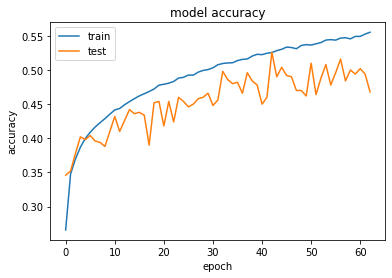

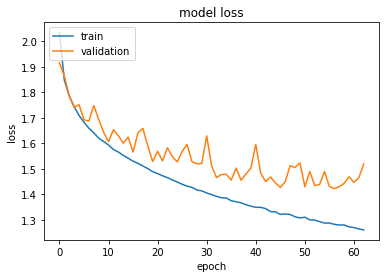

In [ ]:
import matplotlib.pyplot as plt

nb_neurons_first_layer = 64
nb_neurons_second_layer = 64
model = Sequential()

model.add(Dense(nb_neurons_first_layer, input_dim=input_size, activation='relu'))
model.add(Dense(nb_neurons_second_layer, input_dim=input_size, activation='relu'))

model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])


print("Training....") #Cette fois on va lancer pour 300 epochs toujours avec la fonction callback
history = model.fit(X_train_flatten, y_train_cat, validation_data=(X_val_flatten, y_val_cat), epochs=300, batch_size=125, callbacks=[ourCallback])

print("Testing...")
score = model.evaluate(X_test_flatten ,y_test_cat)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



*   **Pour 2 couches de 64 neurones : 48.40% de précision**

*   **Pour 2 couches de 64 et 32 neurones : 50.80% de précision** 

*   **Pour 2 couches de 32 neurones : 48,20 % de précision**

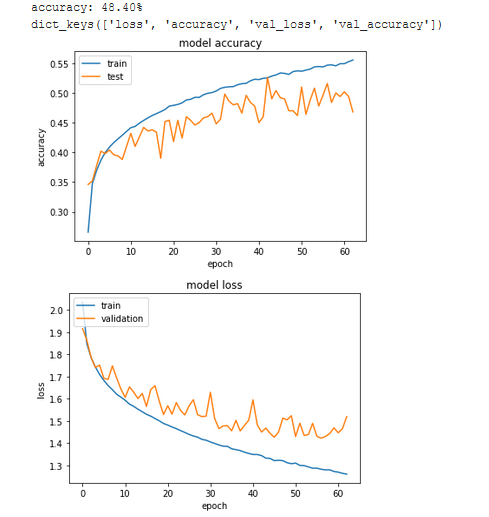


**Nous allons ajouter les "Drop out", c'est à dire, un pourcentage de neurones que l'on décidera d'ignorer durant l'apprentissage.**

Training....
Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 2.0714 - accuracy: 0.2483 - val_loss: 1.9420 - val_accuracy: 0.3080
Epoch 2/100
400/400 [==============================] - 1s 4ms/step - loss: 1.9082 - accuracy: 0.3222 - val_loss: 1.8625 - val_accuracy: 0.3440
Epoch 3/100
400/400 [==============================] - 1s 4ms/step - loss: 1.8482 - accuracy: 0.3439 - val_loss: 1.8039 - val_accuracy: 0.3880
Epoch 4/100
400/400 [==============================] - 1s 4ms/step - loss: 1.8087 - accuracy: 0.3632 - val_loss: 1.7798 - val_accuracy: 0.3820
Epoch 5/100
400/400 [==============================] - 1s 4ms/step - loss: 1.7813 - accuracy: 0.3689 - val_loss: 1.7533 - val_accuracy: 0.3840
Epoch 6/100
400/400 [==============================] - 1s 4ms/step - loss: 1.7564 - accuracy: 0.3820 - val_loss: 1.7222 - val_accuracy: 0.4040
Epoch 7/100
400/400 [==============================] - 1s 4ms/step - loss: 1.7341 - accuracy: 0.3916 - val_loss: 1.7181 - val_acc

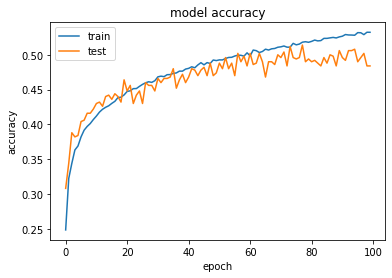

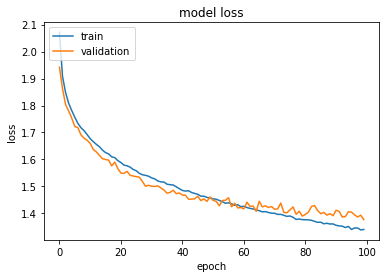

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Dropout

ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=100)

nb_neurons_first_layer = 128
model = Sequential()

model.add(Dense(nb_neurons_first_layer, input_dim=input_size, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])


print("Training....")
history = model.fit(X_train_flatten, y_train_cat, validation_data=(X_val_flatten, y_val_cat), epochs=100, batch_size=125, callbacks=[ourCallback])

print("Testing...")
score = model.evaluate(X_test_flatten ,y_test_cat)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


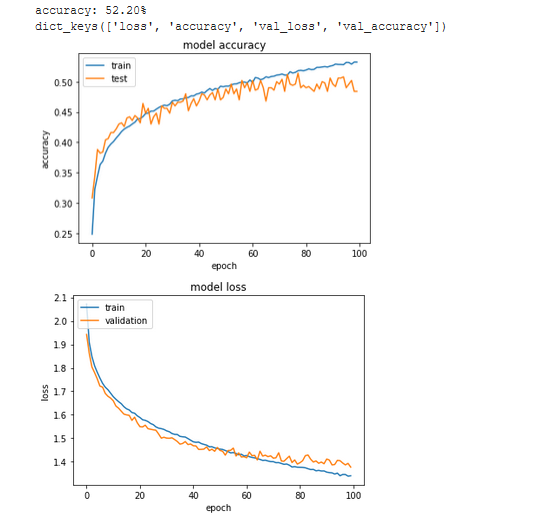

**accuracy: 52.20%, nous avons bien augmenté notre précision avec une seule couche en ajoutant les dropout, mais il est temps d'utiliser les CNN (Convolutional Neural Networks). Cela est conçu pour les images, ainsi, nous allons avoir de meilleurs résultats**. 

### **3.   Apprentissage avec CNN** ###

*   **Lorsque je travaille avec des CNN, j'utilise les images non modifié, car cette méthode est adaptée au traitement d'image. Je ne chargerai que cette cellule après mes données de départ avant de commencer mon travail (pas de flatten ni de découpe des données).**

In [5]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1) 
y_val = y_val.reshape(-1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000,)
(5000, 32, 32, 3) (5000,)
(5000, 32, 32, 3) (5000,)


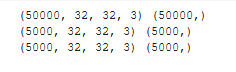


*   **Ici, je modifie les labels afin de les encoder pour qu'ils soient plus lisible pour mon réseau de neurones**


In [6]:
import keras
nb_classes = 10 #Nous avons 10 classes (de 0 à 9)
y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10) 
y_val_cat = keras.utils.to_categorical(y_val, 10)


print("Original class:", y_test[0], ", Class in one-hot encoding:", y_test_cat[0]) #Vérifions quelques valeurs pour les données déstinées au CNN
print("Original class:", y_test[1], ", Class in one-hot encoding:", y_test_cat[1])
print("Original class:", y_test[2], ", Class in one-hot encoding:", y_test_cat[2])
print("Original class:", y_test[3], ", Class in one-hot encoding:", y_test_cat[3])

Original class: 8 , Class in one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Original class: 3 , Class in one-hot encoding: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Original class: 2 , Class in one-hot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Original class: 4 , Class in one-hot encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


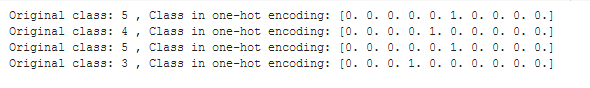



*   **Testons un premier modèle, assez simple:**




In [7]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras import Model

In [ ]:

#On défini la couche input
picture = Input(shape=(32,32,3)) 

#Dans une première entrée on définie les filtres et taille de ses filtres
conv_1 = Conv2D(filters=32, kernel_size=(8,15), strides=(1,1), padding='same', activation="relu", name="conv_1")(picture)

reshape = Flatten(name="flatten")(conv_1)

# Couche de 128 nerurones
dense_1 = Dense(128, activation = 'relu', name="dense_1")(reshape)

# dropout
dropout = Dropout(rate = 0.2, name="dropout")(dense_1)

# Autre couche de 128 neurones
dense_2 = Dense(128, activation = 'relu', name="dense_2")(dropout)


output = Dense(10, activation = 'softmax', name="dense_3")(dense_2)

model_cnn = Model(inputs = picture, outputs = output)

model_cnn.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 32)        11552     
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

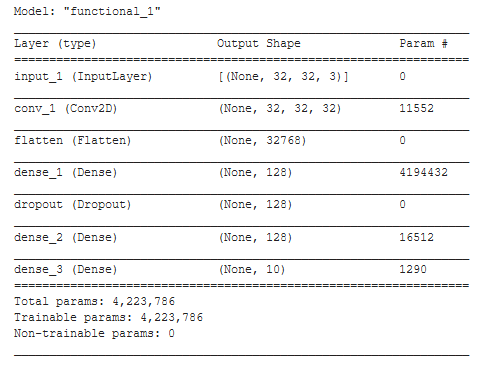

*   **Le réseau a 4,223,786 paramètres à apprendre. On va réduire la taille de l'image après la convolution en utilisant une couche "Pooling". On extrait l'information contenue dans chaque image de manière plus condensée en additionnant certains paramètres.**

In [ ]:
picture = Input(shape=(32,32,3)) 

conv_1 = Conv2D(filters=32, kernel_size=(8,15), strides=(1,1), padding='same', activation="relu", name="conv_1")(picture)

max_pool = MaxPool2D(pool_size=(2, 2))(conv_1)

reshape = Flatten(name="flatten")(max_pool)

dense_1 = Dense(128, activation = 'relu', name="dense_1")(reshape)

dropout = Dropout(rate = 0.2, name="dropout")(dense_1)

output = Dense(10, activation = 'softmax', name="dense_2")(dropout) # Ici on met 10 (au lieu de deux dans le précédent tp car il n'y avait que deux catégories)

model_cnn = Model(inputs = picture, outputs = output)

model_cnn.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 32)        11552     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

*   **On a réduit considérablement le nombre de paramètre à 1,061,546 : presque 4 fois moins que précédemment. Grâce à "maxpool" on a réduit la taille des images en passant de (32,32,32) à (16,16,32).**

In [ ]:
#On entraine le modele
model_cnn.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.003),metrics=['accuracy'])

print("Training ...")

history_cnn = model_cnn.fit(X_train_expanded, y_train_cat, validation_data = (X_val_expanded, y_val_cat) ,batch_size=128, epochs=10, shuffle=True)

Training ...
Epoch 1/10
391/391 [==============================] - 3s 7ms/step - loss: 1.7716 - accuracy: 0.3621 - val_loss: 1.5435 - val_accuracy: 0.4416
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5610 - accuracy: 0.4369 - val_loss: 1.4704 - val_accuracy: 0.4652
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4946 - accuracy: 0.4631 - val_loss: 1.4020 - val_accuracy: 0.4900
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4341 - accuracy: 0.4833 - val_loss: 1.4928 - val_accuracy: 0.4686
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3930 - accuracy: 0.5002 - val_loss: 1.3409 - val_accuracy: 0.5176
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3615 - accuracy: 0.5128 - val_loss: 1.3450 - val_accuracy: 0.5164
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3343 - accuracy: 0.5216 - val_loss: 1.3332 - val_accuracy: 

**Nous tournons dans les alentours de 68% de précision après avoir essayé différentes combinaisons (batch size, epoch, nombre de neurones dans les couches etc...), ce qui n'est pas encore suffisant:**
*   **Nous allons ajouter des couches.**
*   **Nous allons faire des apprentissages avec un learning rate variant entre les epochs**
*   **Nous allons mieux gérer nos Drop out et nos couche de Pooling**

In [8]:

def CNN():


  picture = Input(shape=(32,32,3)) 

  conv_1 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation= None, padding='same')(picture)
  norm_1 = BatchNormalization()(conv_1)
  activ_1 = Activation('relu')(norm_1)

  conv_2 = Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), activation= None,padding='same')(activ_1)
  norm_2 = BatchNormalization()(conv_2)
  activ_2 = Activation('relu')(norm_2)

  max_pool = MaxPool2D(pool_size=(2, 2))(activ_2)
  dropout_2 = Dropout(rate=0.1)(max_pool)

  conv_3 = Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), activation= None,padding='same')(dropout_2)
  norm_3 = BatchNormalization()(conv_3)
  activ_3 = Activation('relu')(norm_3)

  conv_4 = Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), activation= None,padding='same')(activ_3)
  norm_4 = BatchNormalization()(conv_4)
  activ_4 = Activation('relu')(norm_4)

  max_pool1 = MaxPool2D(pool_size=(2, 2))(activ_4)
  dropout_4 = Dropout(rate=0.1)(max_pool1)

  conv_5 = Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), activation= None,padding='same')(dropout_4)
  norm_5 = BatchNormalization()(conv_5)
  activ_5 = Activation('relu')(norm_5)

  conv_6 = Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), activation= None,padding='same')(activ_5)
  norm_6 = BatchNormalization()(conv_6)
  activ_6 = Activation('relu')(norm_6)

  max_pool2 = MaxPool2D(pool_size=(2, 2))(activ_6)
  dropout_6 = Dropout(rate=0.1)(max_pool2)

  reshape = Flatten()(dropout_6)


  output = Dense(10, activation = 'softmax')(reshape)

  modell = Model(inputs = picture, outputs = output)

  return modell

model_cnn = CNN()


In [9]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.005),metrics=['accuracy'])

model_cnn.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)      

In [10]:
print("Training ...")
history_cnn = model_cnn.fit(X_train,y_train_cat,validation_data = (X_val, y_val_cat),batch_size=1000, epochs=4)

print("Testing ...")

loss, accuracy = model_cnn.evaluate(X_test, y_test_cat,verbose = 1)

print('model accuracy:',accuracy)

Training ...
Epoch 1/4
36/50 [====================>.........] - ETA: 5s - loss: 3.3268 - accuracy: 0.1462

KeyboardInterrupt: ignored

*   **Un premier modèle après quelques apprentissage me donne 85% de précision. Je continue à faire de l'apprentissage afin de voir si je peux monter à 90%.**



*   **La cellule suivante m'a permis de tester avec mon CNN différentes valeurs de Learning Rate, et différents outil (Adam et SGD) pour appliquer ce même learning rate. Il est apparu que la meilleure combinaison est pour : lr= 0.005 avec "Adam"**



In [ ]:
from keras.optimizers import Adam,SGD

lr=[0.1,0.01,0.005,0.001,0.0005,0.0001]
best_lr=0
best_accuracy=0

for i in lr:
  optimizer_list = [keras.optimizers.SGD(learning_rate=i) , keras.optimizers.Adam(learning_rate=i)]
  
  for opt in optimizer_list : 

    model_cnn2 = CNN()

    model_cnn2.compile(loss='categorical_crossentropy',optimizer = opt , metrics=['accuracy'])

    print("\n \nTraining")
    history_cnn2 = model_cnn2.fit(X_train,y_train_cat,validation_data = (X_val, y_val_cat),batch_size=64, epochs=13)

    print("Testing ...")

    loss, accuracy = model_cnn2.evaluate(X_test, y_test_cat,verbose = 1)

    print('model accuracy with lr =',i," : ",accuracy*100," % et optimizer : ",opt)


    if best_accuracy < accuracy:
      best_accuracy = accuracy
      best_lr = i
      best_opt = opt

print("la meilleure accuracy ( ",best_accuracy*100," %) est obtenue avec lr = ",best_lr," et optimizer : ",best_opt)


 
Training
Epoch 1/13
782/782 [==============================] - 16s 20ms/step - loss: 1.7515 - accuracy: 0.4514 - val_loss: 1.6478 - val_accuracy: 0.4548
Epoch 2/13
782/782 [==============================] - 15s 20ms/step - loss: 0.9749 - accuracy: 0.6523 - val_loss: 1.2800 - val_accuracy: 0.5656
Epoch 3/13
782/782 [==============================] - 15s 20ms/step - loss: 0.7321 - accuracy: 0.7420 - val_loss: 1.0592 - val_accuracy: 0.6372
Epoch 4/13
782/782 [==============================] - 15s 20ms/step - loss: 0.5964 - accuracy: 0.7916 - val_loss: 1.7382 - val_accuracy: 0.5070
Epoch 5/13
782/782 [==============================] - 15s 20ms/step - loss: 0.4950 - accuracy: 0.8254 - val_loss: 0.6581 - val_accuracy: 0.7830
Epoch 6/13
782/782 [==============================] - 15s 20ms/step - loss: 0.4157 - accuracy: 0.8553 - val_loss: 0.9545 - val_accuracy: 0.7052
Epoch 7/13
782/782 [==============================] - 15s 20ms/step - loss: 0.3501 - accuracy: 0.8791 - val_loss: 1.0178 - v

lr_et_optimizer.PNG

*   **Un second modèle après quelques apprentissages, en modifiant les batch size et le nombre d'epochs, me donne 88% de précision. Je l'enregistre mais continue à faire de l'apprentissage afin de voir si je peux monter à 90%.**
*   **Voici le résultats du modèle après test :**

**model accuracy: 0.8831999897956848**



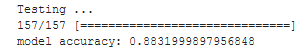

In [ ]:
# serialize model to JSON
model_cnn2_json = model_cnn.to_json()
with open("model_cnn2.json", "w") as json_file:
    json_file.write(model_cnn2_json)

# serialize weights to HDF5
model_cnn.save_weights("weights.h5")
print("Saved model to disk")

Saved model to disk


* **Ici je pourrais réutiliser mes modeles en les chargeant dans loaded_model par le biais de leur nom dans l'enregistrement.**

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('model_cnn2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights.h5")
print("Loaded model from disk")

Loaded model from disk


**J'ai un problème lors de l'utilisation de mon modèle. Ce problème provient de la dimension de l'INPUT. Après de nombreuses recherches et quelques essaies je n'ai pas réussi à l'utiliser en mettant l'image dans la bonne forme ou en lançant mon predict avec les bons paramètres. Je n'ai malheureusement pas eut le temps de chercher plus profondément. L'apprentissage m'a prit beaucoup de temps afin de l'adapter de la meilleure façon.**

ValueError: ignored

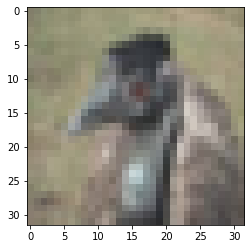

In [ ]:
idx_image_to_test = 200

pyplot.imshow(X_test[idx_image_to_test])

image_to_test = X_test[idx_image_to_test]

prediction = loaded_model.predict(image_to_test)

print("Probabillity Prediction", prediction) ## Probabilty of each class
print("Class prediction", np.argmax(prediction)) ## Class (0 : avion, 1 : automobile, 2 : oiseau, 3 : chat, 4 : cerfs, 5 : chien, 6 : grenouille, 7 : cheval, 8 : navire, 9 : camion)
print("Real class ", y_test[idx_image_to_test])
